
本节会学习：
1. 什么是线性回归模型
2. 线性回归模型的目标是什么，如何评价模型的好坏
- 最小化损失，即残差平方和SSE，越小表明模型预测值跟真实值之间的误差越小
3. 最小二乘法估计是什么



# 线性回归 Linear Regression

线性回归是机器学习中最经典、最简单的模型之一，主要用于回归任务。模型的输入为 $x$，目标是拟合一个线性方程 $y = wx + b$，通过寻找最佳的 $w$ 和 $b$，使得所有样本的累计平方误差之和 $\sum (y - \hat{y})^2$ 最小。

这里的 $(y - \hat{y})^2$ 称为平方误差（Least Squares），平方是为了消除符号带来的影响，而他们的和，一般称之为残差平方和SSE（Sum of Squares for Error），另一个经常使用的是MSE（均方误差），在机器学习中它是回归问题中最常用的损失函数。

我们追求最小化这个损失函数的过程称为最小二乘法估计（会使用求偏导）

下面通过一个实际例子来理解线性回归的过程。最后我们将使用 sklearn 库中的线性回归模型，对一个经典数据集进行训练和求解。



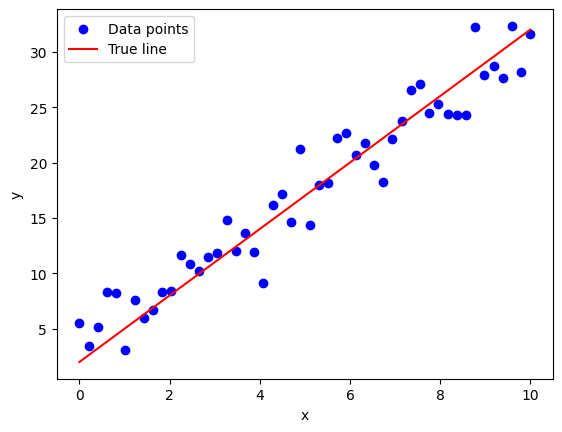

In [ ]:
import numpy as np

# 设置随机种子，方便结果复现
np.random.seed(0)

# 生成 x
x = np.linspace(0, 10, 50)

# 真实模型: y = 3x + 2 + noise
true_w = 3
true_b = 2

noise = np.random.normal(0, 2, size=x.shape)
y = true_w * x + true_b + noise

#可视化
import matplotlib.pyplot as plt
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, true_w * x + true_b, color='red', label='True line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()



先不管参数的问题，我们最终找到的线性方程是否有，对于任意预测的 $\hat{y}$，我们有 $\hat{y} = wx + b$。

那么，如果我们想让这条线更加的准，就应该让这条线的预测 $\hat{y}$ 和真实的 $y$ 差值尽量的小，也就有了 SSE（残差平方和）的概念，公式如下：

$$
SSE = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{n} (y_i - (wx_i + b))^2  
$$

其中，$y_i$ 是第 $i$ 个样本的真实值，$\hat{y}_i$ 是模型预测值，$n$ 是样本数量。我们希望通过调整参数 $w$ 和 $b$，使得 SSE 最小化，从而得到最优的线性回归模型。

因此我们下一步的问题变成了如何找到最小的SSE？

对于SSE的方程,其实就是一个


In [7]:
# 构造设计矩阵：第二列是全1，对应偏置 b
X = np.column_stack([x, np.ones_like(x)])


In [ ]:
# Normal Equation: theta = (X^T X) ^(-1) X^T y
XtX = X.T @ X
Xty = X.T @ y

theta = np.linalg.inv(XtX) @ Xty

w_hat = theta[0]
b_hat = theta[1]

print("Estimated w:", w_hat)
print("Estimated b:", b_hat)


# 用求得的参数来预测
y_pred = X @ theta

# 看一下平均误差
mse = np.mean((y - y_pred)**2)
print("MSE:", mse)


Estimated w: 2.7176755014019642
Estimated b: 3.692741037616382
MSE: 4.375870091712563


# 附录
MSE公式：
$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$